In [14]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.dummy import DummyClassifier
from sklearn.metrics import fbeta_score, precision_score, recall_score

In [15]:
df_train = pd.read_hdf("../input/train_churn_pred.h5")
df_test = pd.read_hdf("../input/test_churn_pred.h5")
df_train.shape, df_test.shape

((34999, 171), (35000, 170))

In [6]:
df_train.columns

Index(['id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'arpu_6', 'arpu_7', 'arpu_8',
       ...
       'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'churn_probability'],
      dtype='object', length=171)

<AxesSubplot:>

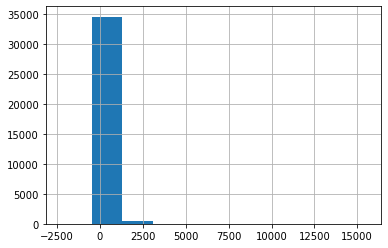

In [18]:
df_train['arpu_6'].hist()

<AxesSubplot:>

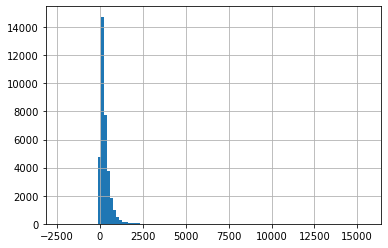

In [19]:
df_train['arpu_6'].hist(bins =100)

In [54]:
(df_train['arpu_6']  == '-inf').sum()

0

In [22]:
arpu_log = np.log(df_train['arpu_6'])

In [55]:
arpu_log[arpu_log <= 0] = 0

<AxesSubplot:>

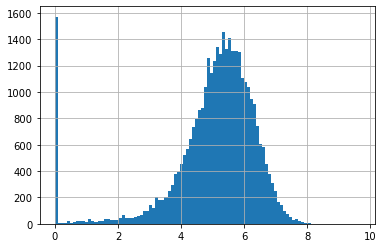

In [58]:
arpu_log.hist(bins = 100)

In [59]:
 df_train['arpu_log']= arpu_log

In [7]:
df_train['arpu_6'].var()

105864.44

In [15]:
mean_ = df_train['arpu_6'].mean()
mean_

282.20078

In [16]:
var = np.mean([(i  - mean_)**2 for i in  df_train['arpu_6'] ])
var

105861.4159174919

In [17]:
var**0.5

325.36351350065655

In [60]:
np.var(df_train['arpu_log'])

2.2485254

In [65]:
np.median(df_train['arpu_6'])

196.879

In [71]:
q = (np.percentile(df_train['arpu_6'], 75) - np.percentile(df_train['arpu_6'], 25))/2
q

138.39875030517578

In [69]:
q/np.median(df_train['arpu_6'])*100

70.29635047403396

In [74]:
np.percentile(df_train['arpu_6'], 99) / np.percentile(df_train['arpu_6'], 10)

44.49441292380174

<AxesSubplot:>

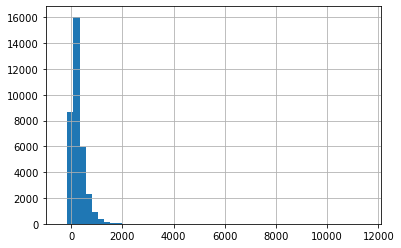

In [100]:
df_train[df_train['arpu_8'] < np.percentile(df_train['arpu_6'],99)]['arpu_6'].hist(bins = 50)

In [97]:
df_train['arpu_6'].skew()

8.626272

In [95]:
df_train[df_train['arpu_6']<= 0].shape

(1429, 172)

In [103]:
np.arange(9.0).reshape((3,3))

array([[0., 1., 2.],
       [3., 4., 5.],
       [6., 7., 8.]])

In [114]:
np.subtract(*np.percentile(df_train['arpu_6'], [75,25]))/2

138.39875030517578

In [117]:
(np.mean(df_train['arpu_6']) - np.std(df_train['arpu_6']), np.mean(df_train['arpu_6']) + np.std(df_train['arpu_6']))

(-43.16275, 607.56433)

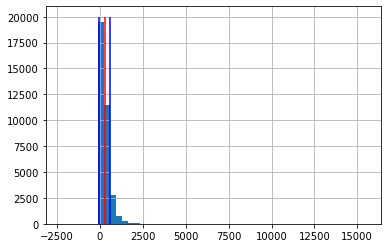

In [127]:
df_train['arpu_6'].hist(bins =50)
plt.vlines(x = df_train['arpu_6'].mean(), ymin = 0, ymax = 20000, color = 'red')
plt.vlines(x = [(np.mean(df_train['arpu_6']) - np.std(df_train['arpu_6']), np.mean(df_train['arpu_6']) + np.std(df_train['arpu_6']))],
           ymin = 0, ymax = 20000, color = 'blue')

### Wizualizacja 

In [6]:
df_train[['total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'churn_probability']].groupby('churn_probability').agg('mean')

,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8
churn_probability,,,
0,204.221909,211.525742,213.959351
1,139.901855,98.978706,39.676792


In [33]:
feats = ['total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8']


<AxesSubplot:xlabel='churn_probability', ylabel='total_ic_mou_8'>

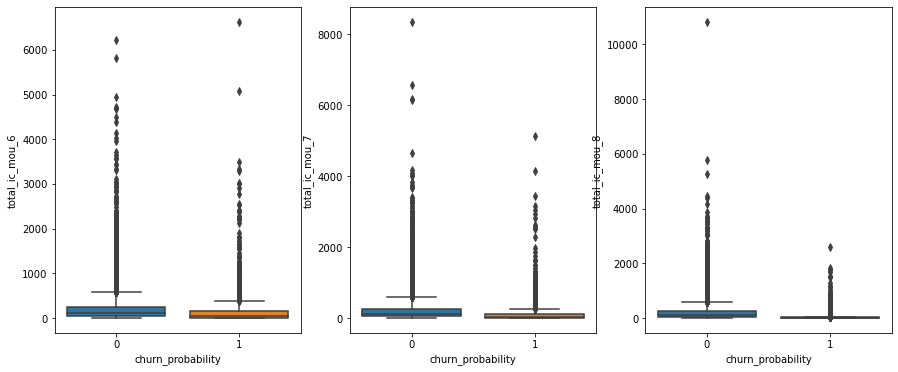

In [64]:

fig , axs = plt.subplots(1,3, figsize = (15,6))
sns.boxplot(ax = axs[0] ,x = 'churn_probability', y = 'total_ic_mou_6', data = df_train)

sns.boxplot(ax = axs[1], x = 'churn_probability', y = 'total_ic_mou_7', data = df_train)

sns.boxplot(ax = axs[2], x = 'churn_probability', y = 'total_ic_mou_8', data = df_train)

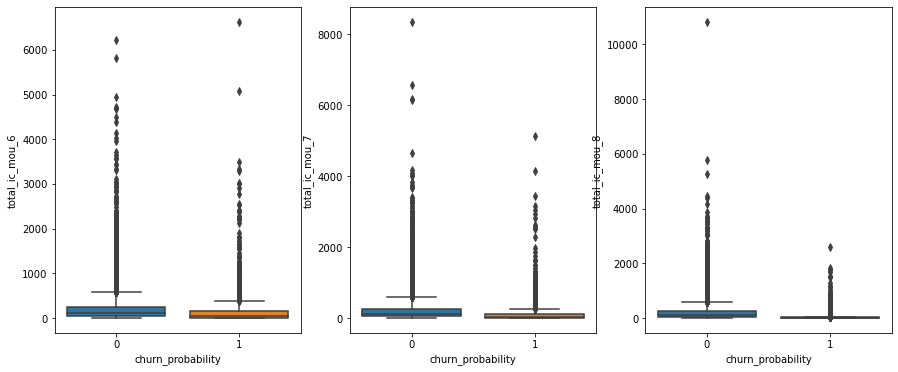

In [71]:
plt.figure( figsize = (15,6))

plt.subplot(1,3,1)
sns.boxplot(x = 'churn_probability', y = 'total_ic_mou_6', data = df_train)
plt.subplot(1,3,2)
sns.boxplot(x = 'churn_probability', y = 'total_ic_mou_7', data = df_train)
plt.subplot(1,3,3)
sns.boxplot(x = 'churn_probability', y = 'total_ic_mou_8', data = df_train)
plt.show()

In [72]:
df_train['total_ic_mou_8'].describe()

count    34999.000000
mean       196.201950
std        281.429352
min          0.000000
25%         37.635000
50%        113.580002
75%        249.070000
max      10830.379883
Name: total_ic_mou_8, dtype: float64

In [77]:
IQR = np.subtract(*np.percentile(df_train['total_ic_mou_8'],[75,25]))

In [84]:
my_max = np.percentile(df_train['total_ic_mou_8'], 75) + IQR

In [85]:
my_max

460.5049991607666

In [90]:
df_train[df_train['total_ic_mou_6'] > my_max]['churn_probability'].value_counts()

0    3355
1     229
Name: churn_probability, dtype: int64

In [91]:
df_train[df_train['total_ic_mou_7'] > my_max]['churn_probability'].value_counts()

0    3447
1     144
Name: churn_probability, dtype: int64

In [89]:
df_train[df_train['total_ic_mou_8'] > my_max]['churn_probability'].value_counts()

0    3432
1      57
Name: churn_probability, dtype: int64

In [106]:
def get_iqr_cof(data, cof = 1.5):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    
    max_cof = q3 + cof*iqr
    min_cof = q1 - cof*iqr
    return min_cof, max_cof

In [112]:
min_cof, max_cof = get_iqr_cof(df_train['total_rech_num_6'])
df_train[df_train['total_rech_num_6'] >  max_cof]['churn_probability'].value_counts()

0    1950
1     298
Name: churn_probability, dtype: int64

In [113]:
min_cof, max_cof = get_iqr_cof(df_train['total_rech_num_7'])
df_train[df_train['total_rech_num_7'] >  max_cof]['churn_probability'].value_counts()

0    1651
1     146
Name: churn_probability, dtype: int64

In [111]:
min_cof, max_cof = get_iqr_cof(df_train['total_rech_num_8'])
df_train[df_train['total_rech_num_8'] >  max_cof]['churn_probability'].value_counts()

0    2226
1      58
Name: churn_probability, dtype: int64

In [116]:
df_train['total_ic_mou_6'].skew()

5.093659

In [115]:
df_train['total_rech_num_8'].skew()

3.1658766861737506

In [122]:
feats_select = [
'date_of_last_rech_6',
'date_of_last_rech_7',
'date_of_last_rech_8',
'date_of_last_rech_data_6',
'date_of_last_rech_data_7',
'date_of_last_rech_data_8',
'fb_user_6',
'fb_user_7',
'fb_user_8',
'night_pck_user_6',
'night_pck_user_7',
'night_pck_user_8']

In [123]:
df_train[feats_select]

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,fb_user_6,fb_user_7,fb_user_8,night_pck_user_6,night_pck_user_7,night_pck_user_8
3,6/20/2014,7/16/2014,8/26/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6/22/2014,7/31/2014,8/26/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,6/14/2014,7/30/2014,8/30/2014,NaN,7/24/2014,8/25/2014,NaN,1.0,1.0,NaN,0.0,0.0
10,6/30/2014,7/22/2014,8/26/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,6/25/2014,7/17/2014,8/19/2014,6/12/2014,7/10/2014,8/8/2014,1.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
69987,6/26/2014,7/28/2014,8/28/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69993,6/30/2014,7/17/2014,8/28/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69994,6/29/2014,7/31/2014,8/31/2014,NaN,NaN,8/9/2014,NaN,NaN,1.0,NaN,NaN,0.0
69997,6/27/2014,7/25/2014,8/30/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [125]:
df_train['fb_user_6'].value_counts()

1.0    8029
0.0     738
Name: fb_user_6, dtype: int64

<AxesSubplot:xlabel='churn_probability', ylabel='arpu_6'>

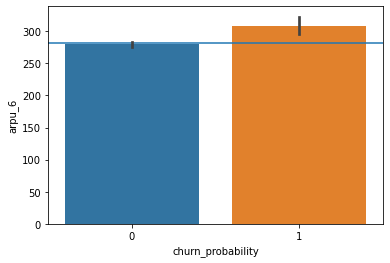

In [31]:

plt.hlines(y = df_train.arpu_6.mean(), xmin = -1, xmax = 2  )
sns.barplot(x = 'churn_probability', y = 'arpu_6', data = df_train)

In [25]:
df_train[['arpu_6', 'churn_probability']].groupby('churn_probability').agg('mean')

,arpu_6
churn_probability,
0,279.283569
1,307.915009


<AxesSubplot:xlabel='total_ic_mou_8', ylabel='total_ic_mou_6'>

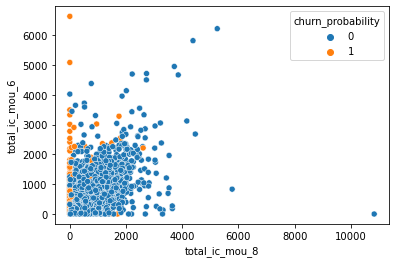

In [34]:
sns.scatterplot( x = 'total_ic_mou_8', y = 'total_ic_mou_6', hue  = 'churn_probability', data = df_train) 

<AxesSubplot:xlabel='total_rech_amt_8', ylabel='total_rech_amt_6'>

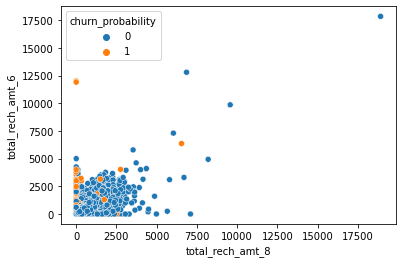

In [35]:
sns.scatterplot( x = 'total_rech_amt_8', y = 'total_rech_amt_6', hue  = 'churn_probability', data = df_train) 

In [37]:
def date_impute(x):
    if x==0:
        return 0
    else:
        return 1

In [38]:
df_train['date_of_last_rech_6'] = df_train['date_of_last_rech_6'].apply(date_impute)

In [42]:
df_train['date_of_last_rech_6'].value_counts()

1    34999
Name: date_of_last_rech_6, dtype: int64